## Attention Unet

An Attention U-Net is a specialized type of neural network that integrates attention mechanisms into the U-Net architecture. U-Nets are primarily used for image segmentation tasks. By adding attention mechanisms, the Attention U-Net can more effectively focus on relevant parts of the image, leading to better segmentation performance. It captures the low level spatial information and merges with the layers from deeper part of network that has feature information. It is then passed through relu and sigmoid function to assign weights to it


## Importing Libraries

In [81]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from utils import jacard_coef, dice_coef, dice_loss, focal_loss, combined_loss
from models import AttentionUNet
from keras.callbacks import EarlyStopping

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


##Dataset Preparation

In [82]:
# # Save the images and masks using numpy
# np.save('dataset/train_images.npy', src_images)
# np.save('dataset/train_masks.npy', tar_images)
# np.save('dataset/test_images.npy', src_test_images)
# np.save('dataset/test_masks.npy', tar_test_images)


# # Load the images and masks using numpy
src_images = np.load('dataset/train_images.npy')
tar_images = np.load('dataset/train_masks.npy')
src_test_images = np.load('dataset/test_images.npy')
tar_test_images = np.load('dataset/test_masks.npy')

##Model

## Training

In [83]:
input_shape = (128,128,3)
attention_unet = AttentionUNet(input_shape)
model = attention_unet.get_model()

model.compile(optimizer = 'adam',loss = [combined_loss],metrics = [jacard_coef])
# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(src_images,tar_images,validation_split = 0.1,batch_size = 5,epochs = 30, callbacks=[early_stopping])

Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - jacard_coef: 0.2227 - loss: 0.3337 - val_jacard_coef: 0.0443 - val_loss: 0.4659
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - jacard_coef: 0.4745 - loss: 0.1853 - val_jacard_coef: 0.0176 - val_loss: 0.5040
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - jacard_coef: 0.5783 - loss: 0.1413 - val_jacard_coef: 0.0083 - val_loss: 0.5200
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step - jacard_coef: 0.6400 - loss: 0.1182 - val_jacard_coef: 0.0104 - val_loss: 0.5231
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - jacard_coef: 0.6683 - loss: 0.1079 - val_jacard_coef: 0.2209 - val_loss: 0.3494
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 261ms/step - jacard_coef: 0.6894 - loss: 0.1000 - val_jacard_coef: 0.4572 - val_loss: 0.2038
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 268ms/step - jacard_coef: 0.6987 - loss: 0.0970 - val_jacard_coef: 0.6169 - val_loss: 0.1280
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - 

Inferenence

In [146]:
pred = model.predict(src_test_images)
print(dice_coef(tar_test_images,pred))
print(jacard_coef(tar_test_images,pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
tf.Tensor(0.7900214, shape=(), dtype=float32)
tf.Tensor(0.6529218, shape=(), dtype=float32)


In [91]:
# pred = (model.predict(src_test_images) * 255).astype(np.uint8)
# pred = np.squeeze(pred, axis=-1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


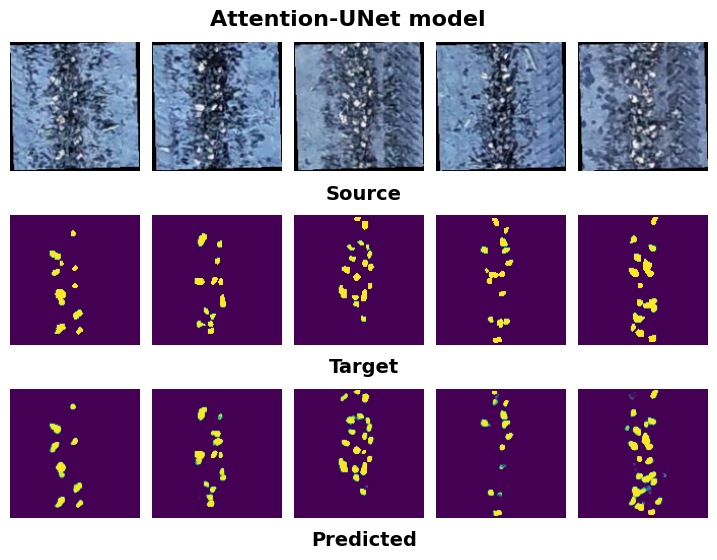

In [148]:
n_samples = 5
# Assuming 'expected' contains your ground truth images and 'pred' contains predicted images
plt.figure(figsize=(9, 6))

for i in range(n_samples):
    # Plot actual image
    plt.subplot(3, n_samples, 1 + i)
    plt.axis('off')
    plt.imshow(src_test_images[i])

    # Plot expected image
    plt.subplot(3, n_samples, 1 +  n_samples + i)
    plt.axis('off')
    plt.imshow(tar_test_images[i])

    # Plot predicted image
    plt.subplot(3, n_samples, 1 + 2 * n_samples + i)
    plt.axis('off')
    plt.imshow(pred[i])


plt.subplot(3, n_samples, 1)
plt.text(350, 150, 'Source', va='center', ha='center', rotation=0, fontsize=14, weight='bold')

plt.subplot(3, n_samples, 1 + n_samples)
plt.text(350, 150, 'Target', va='center', ha='center', rotation=0, fontsize=14, weight='bold')

plt.subplot(3, n_samples, 1 + 2 * n_samples)
plt.text(350, 150, 'Predicted', va='center', ha='center', rotation=0, fontsize=14, weight='bold')

plt.suptitle('Attention-UNet model', fontsize=16, weight='bold')
# Adjust layout to fit titles
plt.subplots_adjust(wspace=0.1, hspace=0.1, top=0.95)

plt.show()